In [47]:
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score

In [2]:
df = pd.read_csv('IMDBDataset.csv')
df['class']=df['class'].replace({'positive':1,'negative':0})

C:\Users\Humza\AppData\Local\Temp\ipykernel_25408\1288406944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class']=df['class'].replace({'positive':1,'negative':0})


In [4]:
stopwords = [
    'a', 'an', 'the', 'and', 'or', 'but', 'if', 'then', 'of', 'at', 'in', 
    'on', 'to', 'for', 'with', 'by', 'from', 'about', 'as', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 
    'did', 'will', 'would', 'can', 'could', 'should', 'shall', 'may', 'might', 
    'must', 'that', 'this', 'these', 'those', 'it', 'its', 'he', 'she', 'his', 
    'her', 'they', 'them', 'their', 'you', 'your', 'we', 'us', 'our', 'i', 'me', 
    'my', 'mine', 'myself', 'yourself', 'himself', 'herself', 'itself', 'themselves', 
    'which', 'what', 'who', 'whom', 'when', 'where', 'why', 'how', 'up', 'down', 
    'out', 'into', 'under', 'over', 'more', 'so', 'very', 'too', 
    'just', 'than', 'any', 'much', 'many', 'some', 'other', 'such', 'each', 
    'every', 'all', 'only', 'again', 'ever', 'never', 'always', 'often', 
    'sometimes', 'less', 'most', 'few', 'several', 'own', 'same', 'both', 'either', 'movie'
    'film'
]

In [5]:
stemmer = PorterStemmer()
def clean_review(review:str)->str:
    review = review.lower()
    review = review.replace('<br />','')
    review = re.sub(r'[^\w\s]','',review)
    review = re.sub(r'\d+','',review)
    
    words = review.split(' ')
    clean_words = []
    
    clean_words = [stemmer.stem(word) for word in words if word not in stopwords]
    
    return " ".join(clean_words)
    

In [6]:
df['review']= df['review'].apply(clean_review)
df.head()

,review,class
0,one review mention after watch oz episod youl...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [37]:
vectorizer = CountVectorizer()
vectorized = vectorizer.transform(df['review'])

In [8]:
with open('vectorizer.pkl','wb') as file:
    pickle.dump(vectorizer,file)

In [36]:
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [38]:
pca = PCA(n_components=20) 

matrix = pca.fit_transform(vectorized)


In [44]:
X_train,x_test,y_train,y_test = train_test_split(matrix,np.array(df['class']),test_size=0.2,random_state=42)

In [45]:
nb = GaussianNB()
nb.fit(X=X_train,y=y_train)

GaussianNB()

In [50]:
print('Accuracy: ',accuracy_score(y_test,nb.predict(x_test)))
print('Recall: ',recall_score(y_test,nb.predict(x_test)))
print('precision: ',precision_score(y_test,nb.predict(x_test)))

Accuracy:  0.7411
Recall:  0.7168088906529073
precision:  0.7565982404692082


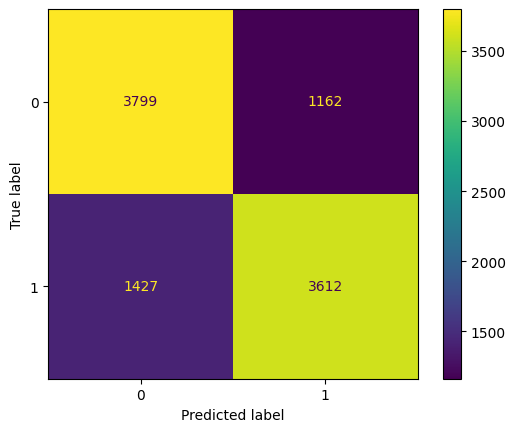

In [23]:
cf = confusion_matrix(y_test,nb.predict(x_test))
display = ConfusionMatrixDisplay(cf)
display.plot()

plt.show()